# Cult Fit Data Cleaning & Preprocessing

This notebook contains the data cleaning and preprocessing steps. The objective is to clean and prepare the data for future analysis such as dynamic pricing, user behavior analytics, or logistic regression.

We will:
- Load the April–June 2018 booking data
- Clean missing values and duplicates
- Standardize formats
- Export the final dataset


Saving Classes April-May 2018.csv to Classes April-May 2018 (1).csv
Saving Classes June 2018.csv to Classes June 2018 (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ActivitySiteID                           3289 non-null   object 
 1   ActivityDescription                      3289 non-null   object 
 2   BookingEndDateTime (Month / Day / Year)  3289 non-null   object 
 3   BookingStartTime                         3289 non-null   object 
 4   MaxBookees                               3289 non-null   int64  
 5   Number Booked                            3289 non-null   int64  
 6   Price (INR)                              3271 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 180.0+ KB

Missing values per column:

ActivitySiteID                              0

/tmp/ipython-input-3-2106484264.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)'], errors='coerce')


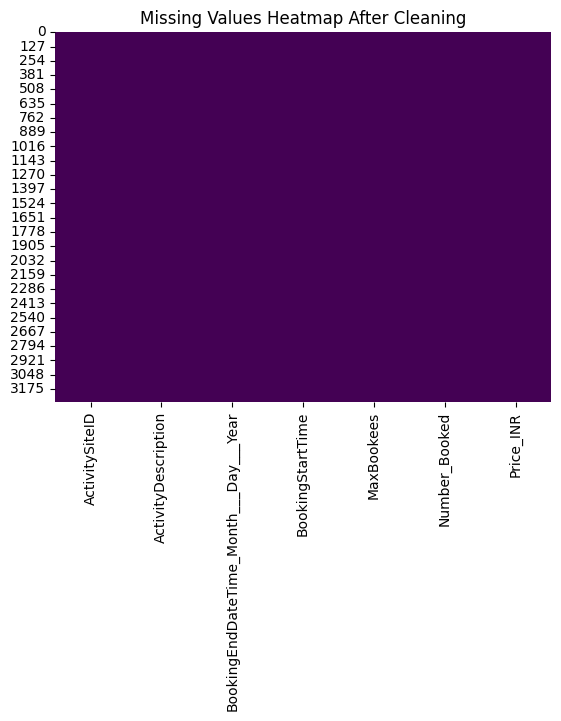

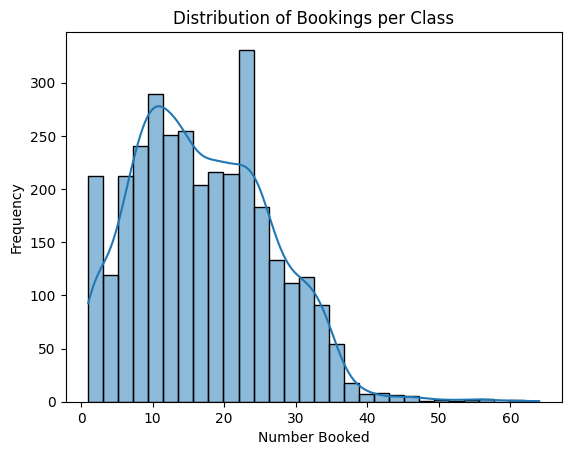

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: to allow file download from Colab
from google.colab import files
# Upload CSV files manually if running in Colab
uploaded = files.upload()  # Choose both CSV files here

# Load them into DataFrames
df1 = pd.read_csv("Classes April-May 2018.csv")
df2 = pd.read_csv("Classes June 2018.csv")

# Combine into one DataFrame
df = pd.concat([df1, df2], ignore_index=True)
df.head()

# View basic info and missing values
df.info()

# Count missing values in each column
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
# Drop duplicates
df.drop_duplicates(inplace=True)

# Forward-fill missing values (safe if data is time-based)
df.ffill(inplace=True)

# Convert date column to datetime (adjust if your column name is different)
if 'BookingEndDateTime (Month / Day / Year)' in df.columns:
    df['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df['BookingEndDateTime (Month / Day / Year)'], errors='coerce')

# Optional: clean column names for consistency
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_")

# Confirm cleaning
df.info()
# Visualize missing values (should be 0 now if cleaned)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap After Cleaning")
plt.show()

# Distribution of number booked
sns.histplot(df['Number_Booked'], kde=True, bins=30)
plt.title("Distribution of Bookings per Class")
plt.xlabel("Number Booked")
plt.ylabel("Frequency")
plt.show()
# Save the cleaned file to Excel
df.to_excel("cleaned_fitness_data.xlsx", index=False)

# Allow download in Google Colab
files.download("cleaned_fitness_data.xlsx")


# Summary

- Combined two datasets covering April to June 2018.
- Cleaned missing values and standardized date format.
- Removed duplicates and standardized column names.
- Exported cleaned dataset as Excel.

